In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import random
import copy

In [2]:
class Sudoku:
    rows = []
    cols = []
    grids = []

    def __init__(self, gridSize, rows = None):
        self.gridSize = gridSize

        if rows is not None:
            self.rows = rows
        else:
            #self.values = np.array([random.randint(1, gridSize**2) for _ in range(gridSize**4)])
            #self.rows = self.values.reshape((gridSize**2, gridSize**2))
            self.rows = np.array([np.random.permutation(np.arange(1, (gridSize**2)+1)) for _ in range((gridSize**2)+1)])
        
        self._updateLists()
        self.fitness = self._getFitness()

    def _getFitness(self):
        score = 0
        for row in self.rows:
            if(len(np.unique(row)) == self.gridSize**2):
                score += 1

        for col in self.cols:
            if(len(np.unique(col)) == self.gridSize**2):
                score += 1

        for grid in self.grids:
            if(len(np.unique(grid)) == self.gridSize**2):
                score += 1

        return score


    def _updateLists(self):
        self.cols = self.rows.transpose()
        
        self.grids = [[] for _ in range(9)]
        
        for row_id in range(self.gridSize**2):
            for col_id in range(self.gridSize**2):
                idx = int(col_id // self.gridSize + ((row_id // self.gridSize) * self.gridSize))
                self.grids[idx].append(self.rows[row_id][col_id])

        self.grids = np.array(self.grids, dtype=np.ndarray)
        self._getFitness()

    def pointCrossover(self, B, reproductionProbability):
        if random.random() < reproductionProbability:
            crosspoint = random.randint(0, (self.gridSize**2)-1)
            return Sudoku(self.gridSize, np.concatenate((self.rows[:crosspoint], B.rows[crosspoint:])))
        else:
            return Sudoku(3, self.rows)
            
    def mutation(self, mutationProbability):
        if random.random() < mutationProbability:
            idx = random.randint(0, (self.gridSize**2)-1)
            self.rows[idx] =  np.random.permutation(np.arange(1, (self.gridSize**2)+1))
            self._updateLists()

    def plot(self):
        
        fig = plt.figure(figsize=(5,5))
        plt.title("Score: " + str(self.fitness))
        ax = fig.add_subplot(111)
        ax.set_xlim((0, 9))
        ax.set_ylim((0, 9))

        #ax.annotate("Rectangle", (cx, cy), color='black', weight='bold', fontsize=10, ha='center', va='center')
        for i in range(self.gridSize**2):
            for j in range(self.gridSize**2):
                ax.annotate(str(self.rows[i][j]), (i+0.5, j+0.5), color='black', weight='bold', fontsize=15, ha='center', va='center')
        '''count = 0
        for queen in solution:
            ax.add_patch(plt.Rectangle((count, queen), 1, 1))
            count += 1'''
        plt.grid(True)
        plt.show(fig)


In [3]:
class GeneticAlgorithm:

    def __init__(self, gridSize, populationSize, generations, reproductionProbability, mutationProbability):
        self.gridSize = gridSize
        self.populationSize = populationSize
        self.generations = generations
        self.reproductionProbability = reproductionProbability
        self.mutationProbability = mutationProbability

    def _getPopulation(self):
        return [Sudoku(self.gridSize) for _ in range(self.populationSize)]

    def _getElite(self, A, B):
        return A if A.fitness > B.fitness else B

    def _tournamentSelection(self, population, k=2):
        community = random.sample(population, k)
        localElite = community[0]
    
        for chromosome in community:
            localElite = self._getElite(chromosome, localElite)
                
        return localElite

    def solve(self):

        fatherPopulation = self._getPopulation() # First Gen
        sonPopulation = []

        eliteIndividual = fatherPopulation[0]
        actualGeneration = 0

        while actualGeneration < self.generations: # OR we haven't found a good solution
            
            for _ in range(self.populationSize):
                G11 = self._tournamentSelection(fatherPopulation)
                G12 = self._tournamentSelection(fatherPopulation)

                G21 = G11.pointCrossover(G12, self.reproductionProbability)
                G21.mutation(self.mutationProbability)

                sonPopulation.append(G21)
                
                eliteIndividual = self._getElite(G21, eliteIndividual)
            
            fatherPopulation = sonPopulation
            sonPopulation = []

            actualGeneration += 1
        
        return eliteIndividual

In [7]:
model = GeneticAlgorithm(3, 100, 50, 0.8, 0.5)
solution = model.solve()

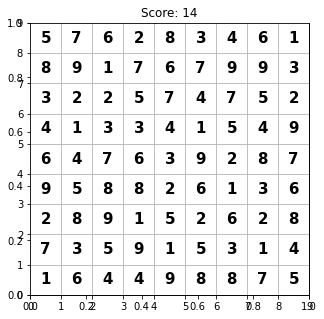

In [8]:
solution.plot()

In [6]:
G11 = Sudoku(3)
G12 = Sudoku(3)
print(G11.rows)
print(G12.rows)
G21 = G11.pointCrossover(G12, 0.8)
print(G21.rows)

[[2 4 1 9 7 3 8 5 6]
 [3 8 5 1 4 7 2 6 9]
 [1 7 8 3 5 6 9 2 4]
 [8 1 3 6 4 5 9 2 7]
 [7 6 8 3 4 1 9 2 5]
 [2 6 4 7 9 1 8 5 3]
 [7 4 5 3 1 2 8 9 6]
 [4 3 7 8 6 2 5 1 9]
 [5 9 7 2 6 4 8 1 3]
 [3 7 8 4 6 9 5 2 1]]
[[3 2 8 7 1 5 6 4 9]
 [7 1 2 4 6 8 3 5 9]
 [1 9 2 5 8 7 4 6 3]
 [5 8 7 2 3 4 1 9 6]
 [3 1 2 5 8 4 6 9 7]
 [8 6 4 1 7 3 9 2 5]
 [3 9 5 8 4 6 2 7 1]
 [8 9 6 2 1 5 4 7 3]
 [2 8 3 9 6 7 4 5 1]
 [5 1 2 9 4 3 6 8 7]]
[[2 4 1 9 7 3 8 5 6]
 [3 8 5 1 4 7 2 6 9]
 [1 7 8 3 5 6 9 2 4]
 [5 8 7 2 3 4 1 9 6]
 [3 1 2 5 8 4 6 9 7]
 [8 6 4 1 7 3 9 2 5]
 [3 9 5 8 4 6 2 7 1]
 [8 9 6 2 1 5 4 7 3]
 [2 8 3 9 6 7 4 5 1]
 [5 1 2 9 4 3 6 8 7]]
